In [ ]:
!pip install matchms

In [2]:
import os
import numpy as np
from matchms.importing import load_from_mgf

path_data = r"C:\Users\Cristina García\Documents\Proyectos\thirdArt"
file_mgf = os.path.join(path_data, "GNPS-NIH-NATURALPRODUCTSLIBRARY.mgf")
spectrums = list(load_from_mgf(file_mgf))

In [3]:
inchikeys = [s.get("inchikey") for s in spectrums]
found_inchikeys = np.sum([1 for x in inchikeys if x is not None])
print(f"Found {int(found_inchikeys)} inchikeys in metadata")

Found 0 inchikeys in metadata


Text(0, 0.5, 'Number of spectra')

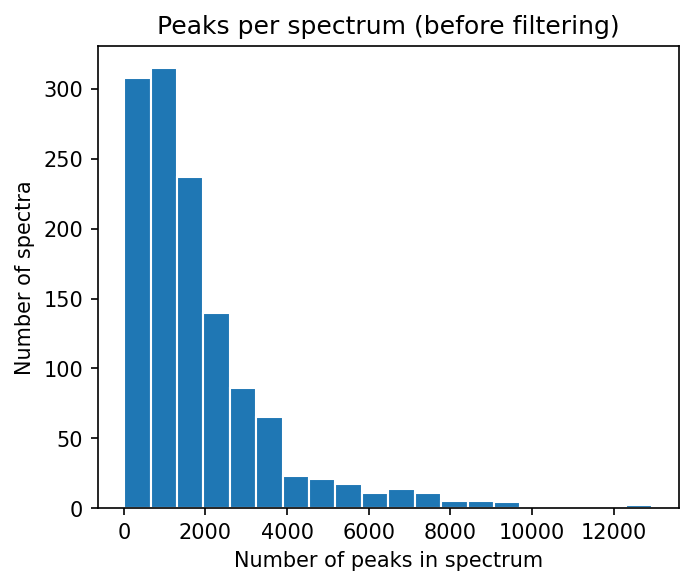

In [4]:
numbers_of_peaks = [len(s.peaks.mz) for s in spectrums]

from matplotlib import pyplot as plt
plt.figure(figsize=(5,4), dpi=150)
plt.hist(numbers_of_peaks, 20, edgecolor = "white")
plt.title("Peaks per spectrum (before filtering)")
plt.xlabel("Number of peaks in spectrum")
plt.ylabel("Number of spectra")

In [5]:
import pickle
file_export_pickle = os.path.join(path_data, "GNPS-NIH-NATURALPRODUCTSLIBRARY_processed.picke")
pickle.dump(spectrums,
            open (file_export_pickle, "wb"))

In [6]:
# repair metadata

import matchms.filtering as ms_filters
def metadata_processing(spectrum):
    spectrum = ms_filters.default_filters(spectrum)
    spectrum = ms_filters.repair_inchi_inchikey_smiles(spectrum)
    spectrum = ms_filters.derive_inchi_from_smiles(spectrum)
    spectrum = ms_filters.derive_smiles_from_inchi(spectrum)
    spectrum = ms_filters.derive_inchikey_from_inchi(spectrum)
    spectrum = ms_filters.harmonize_undefined_smiles(spectrum)
    spectrum = ms_filters.harmonize_undefined_inchi(spectrum)
    spectrum = ms_filters.harmonbarize_undefined_inchikey(spectrum)
    spectrum = ms_filters.add_precursor_mz(spectrum)
    return spectrum

#peaks processing

def peak_processing(spectrum):
    spectrum = ms_filters.default_filters(spectrum)
    spectrum = ms_filters.normalize_intensities(spectrum)
    spectrum = ms_filters.select_by_intensity(spectrum, intensity_from=0.01)
    spectrum = ms_filters.select_by_mz(spectrum, mz_from=10, mz_to=1000)
    return spectrum

spectrums = [metadata_processing(s) for s in spectrums]
spectrums = [peak_processing(s) for s in spectrums]


ImportError: Conda package 'rdkit' is required for this functionality.

In [ ]:
inchikeys = [s.get("inchikey") for s in spectrums]
inchikeys[:10]

In [ ]:
## Similarites

from matchms import calculate_scores
from matchms.similarity import CosineGreedy
similarity_measure = CosineGreedy(tolerance=0.005)

# is_symetric speeds up a bit
scores = calculate_scores(spectrums, spectrums, similarity_measure, is_symmetric=True)


In [ ]:
# matches

best_matches = scores.scores_by_query(spectrums[5], name="CosineGreedy_score", sort=True)[:10]
print([x[1] for x in best_matches])


In [ ]:
[x[0].get("smiles") for x in best_matches]


In [7]:
from rdkit import Chem
from rdkit.Chem import Draw
for i, smiles in enumerate([x[0].get("smiles") for x in    best_matches]):
    m = Chem.MolFromSmiles(smiles)
    Draw.MolToFile(m, f"compound_{i}.png")

ImportError: DLL load failed while importing rdmolfiles: No se encontró el proceso especificado.